In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

## **1. Introduction**

In this notebook, we will:

- Explore the Iris dataset
- Visualize the relationships between features
- Train machine learning models to classify flower species
- Evaluate and compare model performances

## **2. Loading Libraries and Dataset**


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the Iris dataset
from sklearn.datasets import load_iris
data = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['species'] = data.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# **3. Exploratory Data Analysis (EDA)**

In [4]:
# Display information about the dataset
print("Dataset Information:")
print(df.info())

# Basic statistics of the features
print("\nDataset Statistics:")
print(df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Dataset Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%   

In [6]:
#missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

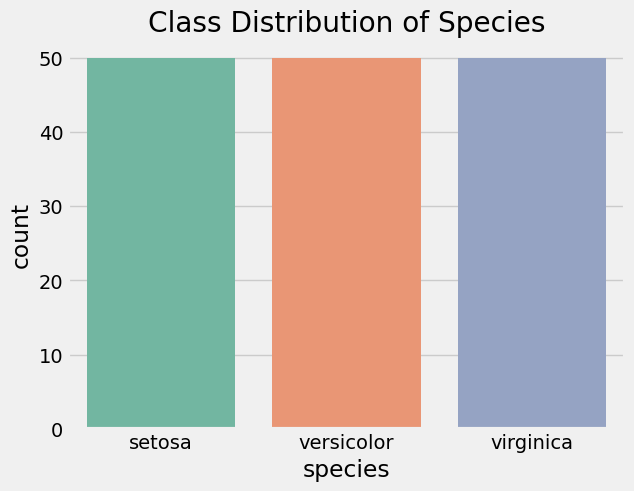

In [7]:
# class distribution
# Plot class distribution
sns.countplot(x='species', data=df, palette='Set2')
plt.title("Class Distribution of Species")
plt.show()

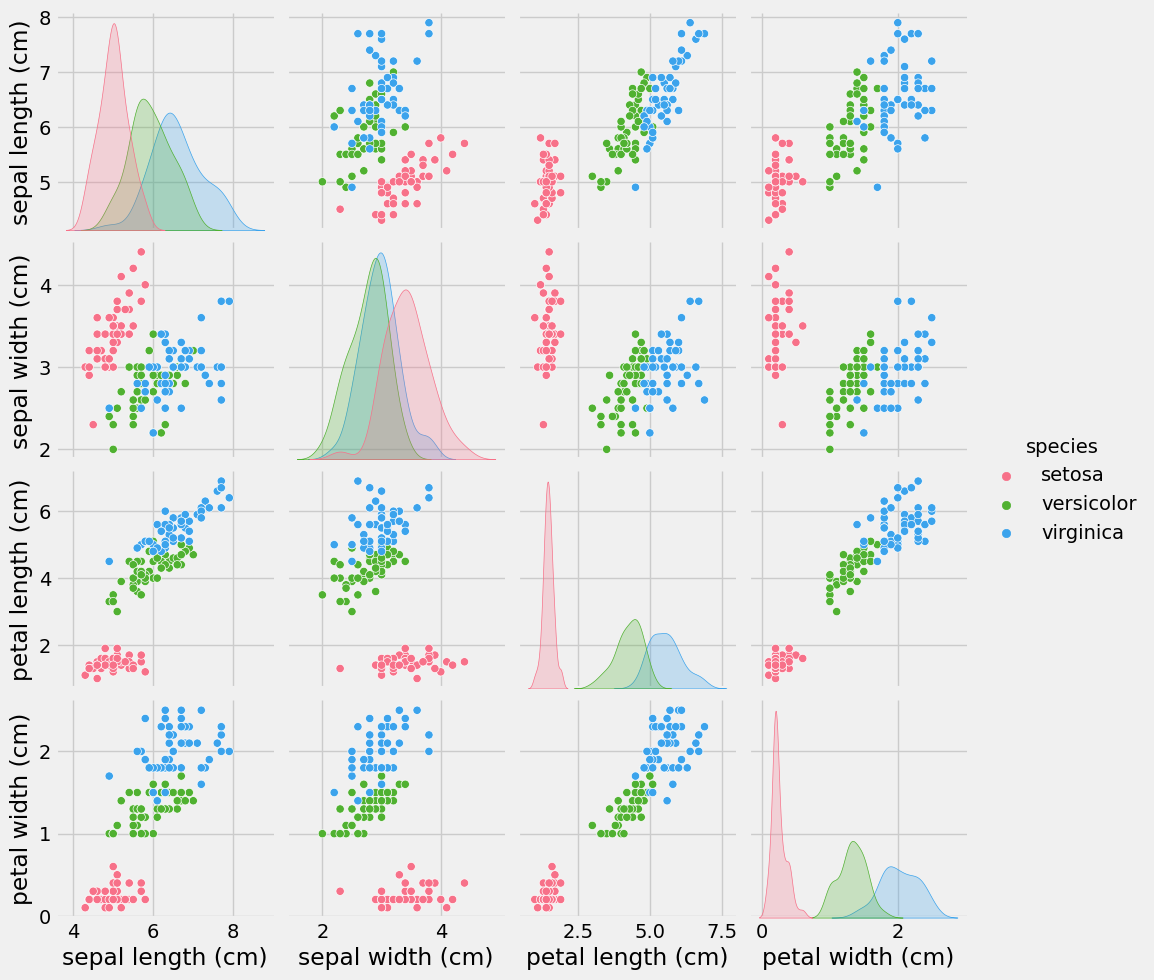

In [8]:
# Pair plot to visualize relationships between features
sns.pairplot(df, hue='species', palette='husl')
plt.show()

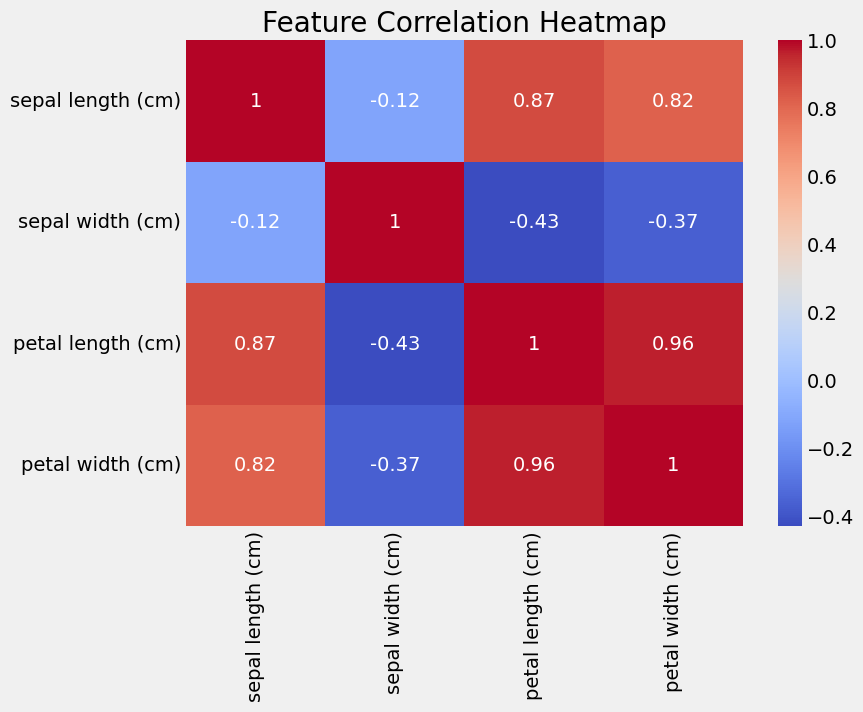

In [10]:
# Compute and visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# 4. Data Preprocessing
Before building the model, we will prepare the data:

Split the dataset into training and test sets.
Standardize the features.

In [11]:
# Separate features and target variable
X = df.drop(columns=['species'])
y = df['species']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 5. Building Machine Learning Model
- Support Vector Classifier (SVC)

## Understanding SVC and Its Parameters
Support Vector Classifier (SVC) has the following key parameters:

1. Kernel: Determines the decision boundary (linear, polynomial, RBF, etc.).
2. C: Regularization parameter to balance margin and misclassification.
3. Gamma: Influences the shape of the decision boundary (for RBF/polynomial kernels).
4. Degree: Degree of polynomial kernel (used only for polynomial kernels).

SVC with Different Kernels

1. Linear Kernel

In [14]:
# Train SVC with linear kernel
svc_linear = SVC(kernel='linear', C=1.0, random_state=42)
svc_linear.fit(X_train, y_train)

# Predictions and evaluation
y_pred_linear = svc_linear.predict(X_test)

print("Classification Report (Linear Kernel):")
print(classification_report(y_test, y_pred_linear))
print("Accuracy:", accuracy_score(y_test, y_pred_linear))


Classification Report (Linear Kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


2. Polynomial Kernel

In [15]:
# Train SVC with polynomial kernel
svc_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)
svc_poly.fit(X_train, y_train)

# Predictions and evaluation
y_pred_poly = svc_poly.predict(X_test)

print("Classification Report (Polynomial Kernel):")
print(classification_report(y_test, y_pred_poly))
print("Accuracy:", accuracy_score(y_test, y_pred_poly))


Classification Report (Polynomial Kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.77      1.00      0.87        10
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30

Accuracy: 0.9


3. RBF Kernel

In [16]:
# Train SVC with polynomial kernel
svc_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)
svc_poly.fit(X_train, y_train)

# Predictions and evaluation
y_pred_poly = svc_poly.predict(X_test)

print("Classification Report (Polynomial Kernel):")
print(classification_report(y_test, y_pred_poly))
print("Accuracy:", accuracy_score(y_test, y_pred_poly))


Classification Report (Polynomial Kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.77      1.00      0.87        10
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30

Accuracy: 0.9


## Visulaizing Decision Boundary

In [23]:
from mlxtend.plotting import plot_decision_regions

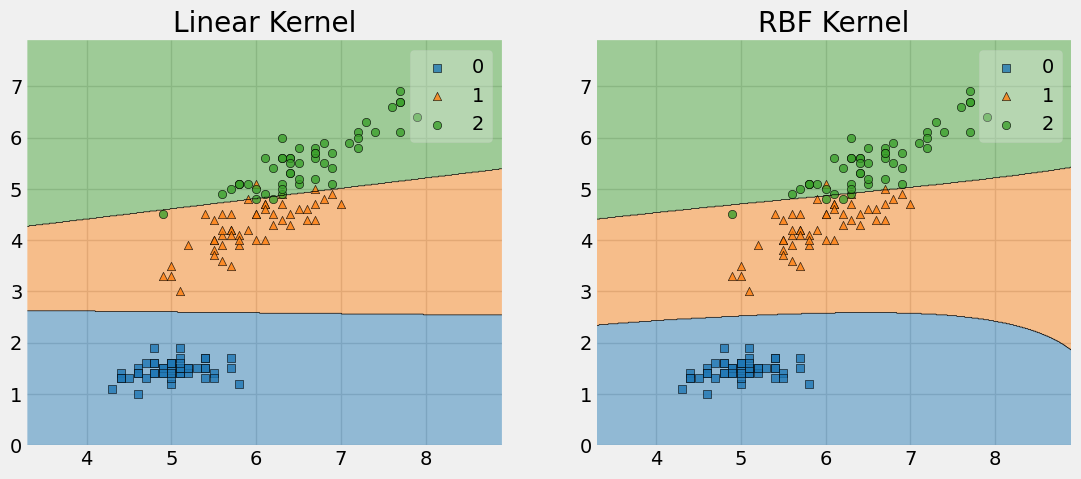

In [20]:
# Select two features for visualization
X_vis = X.iloc[:, [0, 2]].values  # Sepal Length & Petal Length
y_vis = y

# Train models for visualization
svc_linear_vis = SVC(kernel='linear', C=1.0).fit(X_vis, y_vis)
svc_rbf_vis = SVC(kernel='rbf', C=1.0, gamma='scale').fit(X_vis, y_vis)

# Plot decision boundaries
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_regions(X_vis, y_vis, clf=svc_linear_vis)
plt.title("Linear Kernel")

plt.subplot(1, 2, 2)
plot_decision_regions(X_vis, y_vis, clf=svc_rbf_vis)
plt.title("RBF Kernel")

plt.show()


## Hypertuning for best parameter

In [28]:
# Define parameter grid for SVC
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['linear','rbf','polynomial']
}
from sklearn.model_selection import train_test_split, GridSearchCV
# Perform GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on test data
best_svc = grid_search.best_estimator_
y_pred_best = best_svc.predict(X_test)

print("Test Accuracy with Best Parameters:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9833333333333332
Test Accuracy with Best Parameters: 0.9666666666666667
